In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
INALT_mask = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_mesh_mask_iMirabilis.nc')
SIGMA = xr.open_dataset('/gxfs_work1/geomar/smomw523/master-thesis/data/config/ROMS/sigma2depth_parent.nc')
SIGMA_child = xr.open_dataset('/gxfs_work1/geomar/smomw523/master-thesis/data/config/ROMS/sigma2depth_child.nc')

In [3]:
topo_INALT = np.sum((INALT_mask.tmask*INALT_mask.e3t_0).isel(t=0),axis=0)

In [4]:
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

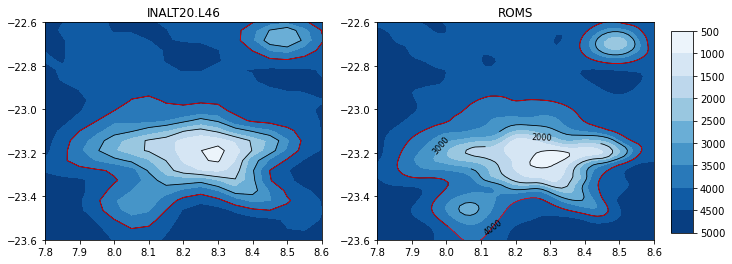

In [5]:
fig=plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('INALT20.L46')  # ODER GLAMF und GPHIT ???
cf_INALT = plt.contourf(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,levels=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000],cmap='Blues')
c_INALT = plt.contour(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,levels=[1000,2000,3000,4000,5000],colors='black',linewidths=0.8)
line4000_INALT = plt.contour(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,levels=[4000],colors='red',linewidths=0.8)
plt.clabel(c_INALT, c_INALT.levels, inline=True, fontsize=8,fmt=fmt)
plt.xlim([7.8,8.6])
plt.ylim([-23.6,-22.6])

plt.subplot(1,2,2)
plt.title('ROMS')
cf_ROMS = plt.contourf(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000],cmap='Blues')
c_ROMS = plt.contour(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=[1000,2000,3000,4000,5000],colors='black',linewidths=0.8)
line4000_ROMS = plt.contour(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=[4000],colors='red',linewidths=0.8)
plt.clabel(c_ROMS, c_ROMS.levels, inline=True, fontsize=8,fmt=fmt)
plt.xlim([7.8,8.6])
plt.ylim([-23.6,-22.6])

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cb=fig.colorbar(cf_ROMS, cax=cbar_ax)
cb.ax.invert_yaxis()

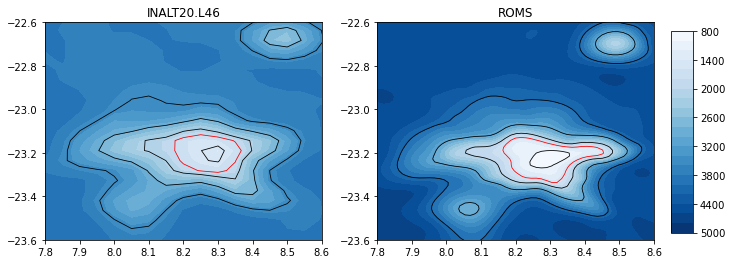

In [6]:
fig=plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('INALT20.L46')  # ODER GLAMF und GPHIT ???
cf_INALT = plt.contourf(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,cmap='Blues',levels=20)
c_INALT = plt.contour(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,colors='black',levels=[1000,2000,3000,4000,5000],linewidths=0.8)
line4000_INALT = plt.contour(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,levels=[1500],colors='red',linewidths=0.8)
#plt.clabel(c_INALT, c_INALT.levels, inline=True, fontsize=8,fmt=fmt)
plt.xlim([7.8,8.6])
plt.ylim([-23.6,-22.6])

plt.subplot(1,2,2)
plt.title('ROMS')
cf_ROMS = plt.contourf(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,cmap='Blues',levels=20)
c_ROMS = plt.contour(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,colors='black',levels=[1000,2000,3000,4000,5000],linewidths=0.8)
line4000_ROMS = plt.contour(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=[1500],colors='red',linewidths=0.8)
#plt.clabel(c_ROMS, c_ROMS.levels, inline=True, fontsize=8,fmt=fmt)
plt.xlim([7.8,8.6])
plt.ylim([-23.6,-22.6])

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cb=fig.colorbar(cf_ROMS, cax=cbar_ax)
cb.ax.invert_yaxis()

In [7]:
difflowerSIGMAlevels = SIGMA.hs.isel(slev=0) - SIGMA.hs.isel(slev=1)
difflowerSIGMAlevels_child = SIGMA_child.hs.isel(slev=0) - SIGMA_child.hs.isel(slev=1)

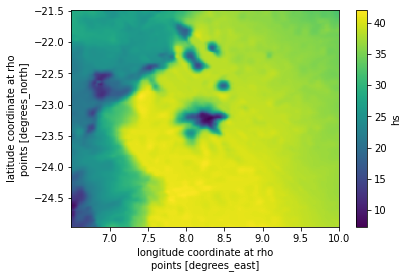

In [8]:
difflowerSIGMAlevels.plot();

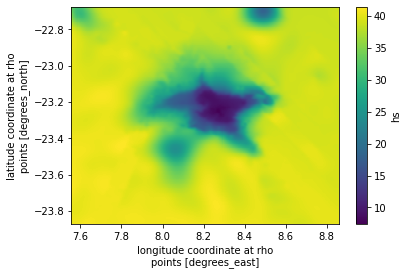

In [9]:
difflowerSIGMAlevels_child.plot();

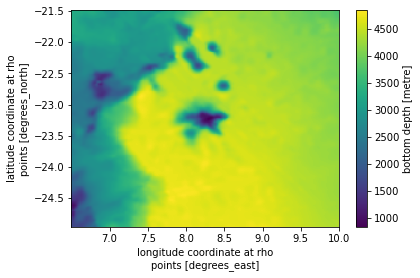

In [10]:
SIGMA.h.plot();

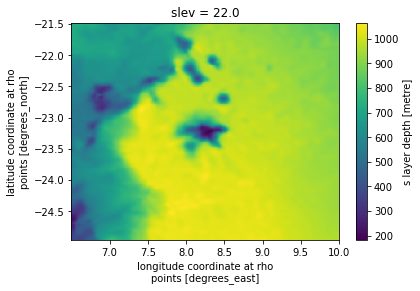

In [39]:
SIGMA.hs.isel(slev=21).plot()

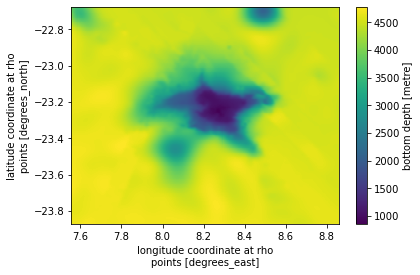

In [11]:
SIGMA_child.h.plot();

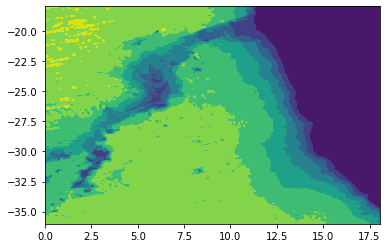

In [12]:

plt.contourf(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT);

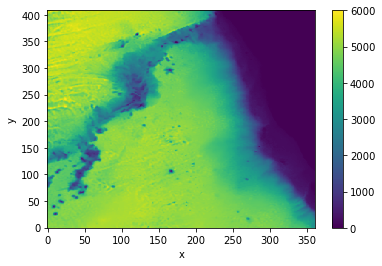

In [13]:
topo_INALT.plot();

In [14]:
from mpl_toolkits import mplot3d

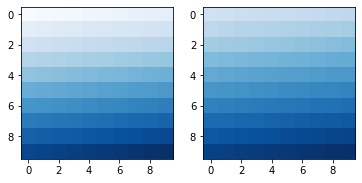

In [15]:
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('Blues')
new_cmap = truncate_colormap(cmap, 0.2, 1)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contourf3D(SIGMA_child.h.lon_rho,SIGMA_child.h.lat_rho,SIGMA_child.h,cmap="jet_r",levels=120)
ax.contour3D(SIGMA_child.h.lon_rho,SIGMA_child.h.lat_rho,SIGMA_child.h,colors='black',levels=[1500])
ax.invert_zaxis()
ax.set_xticks([7.6,8,8.4,8.8],['7.6°E','8°E','8.4°E','8.8°E'])
ax.set_yticks([-23.8,-23.4,-23,-22.6],['23.8°S','23.4°S','23°S','22.6°S'])
ax.set_zlabel('Depth [m]',fontsize=12)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

plt.savefig('../Ewing3D.png');
#ax.set_zticks([0,1000,2000,3000,4000,4500],fontsize=12);

TypeError: 'float' object cannot be interpreted as an integer

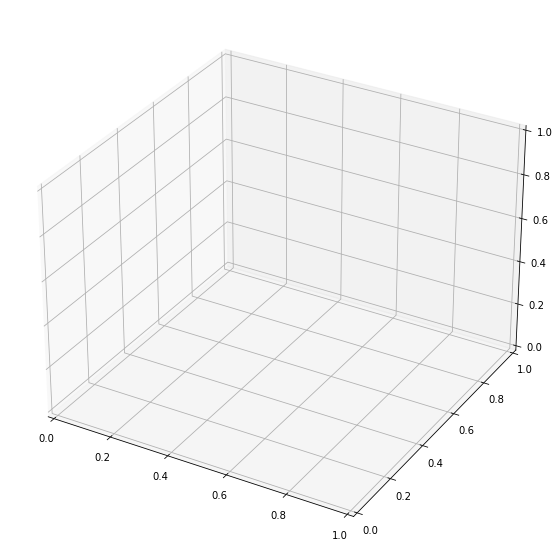

In [26]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.contourf3D(INALT_mask.glamt[0,0,:].sel(x=slice(7.6,8.8)),
              INALT_mask.gphit[0,:,0].sel(y=slice(-23.8,-22.6)),
              topo_INALT.sel(x=slice(7.6,8.8), y=slice(-23.8,-22.6)),cmap=new_cmap,levels=120)
ax.contour3D(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,colors='black',levels=[1500])
ax.invert_zaxis()
ax.set_xticks([7.6,8,8.4,8.8],['7.6°E','8°E','8.4°E','8.8°E'])
ax.set_yticks([-23.8,-23.4,-23,-22.6],['23.8°S','23.4°S','23°S','22.6°S'])
ax.set_zlabel('Depth [m]',fontsize=12)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.set_xlim([7.5,8.8])
#ax.set_ylim([-23.8,-22.5])

#plt.savefig('../Ewing3D.png');
#ax.set_zticks([0,1000,2000,3000,4000,4500],fontsize=12);

In [ ]:
|